# Imports

In [26]:
import pandas as pd
pd.options.display.max_columns = 1000
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings('ignore')
import numpy as np

# Input

In [43]:
train = pd.read_csv('/Users/shiv/Desktop/train.csv')
test = pd.read_csv('/Users/shiv/Desktop/test.csv')

In [44]:
train = train.iloc[:,1:]

In [45]:
X, y = train, train['Cover_Type']

# Analysis

In [30]:
train

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0           2596      51      3                               258   
1           2590      56      2                               212   
2           2804     139      9                               268   
3           2785     155     18                               242   
4           2595      45      2                               153   
5           2579     132      6                               300   
6           2606      45      7                               270   
7           2605      49      4                               234   
8           2617      45      9                               240   
9           2612      59     10                               247   
10          2612     201      4                               180   
11          2886     151     11                               371   
12          2742     134     22                               150   
13          2609     214      7                               150   
14          2503     157      4                                67   
15          2495      51      7                                42   
16          2610     259      1                               120   
17          2517      72      7                                85   
18          2504       0      4                                95   
19          2503      38      5                                85   
20          2501      71      9                                60   
21          2880     209     17                               216   
22          2768     114     23                               192   
23          2511      54      8                               124   
24          2507      22      9                               120   
25          2492     135      6                                 0   
26          2489     163     10                                30   
27          2962     148     16                               323   
28          2811     135      1                               212   
29          2739     117     24                               127   
...          ...     ...    ...                               ...   
15090       2417     194     21                                42   
15091       2614       4     18                               150   
15092       2529      43     33                               319   
15093       2404     194      4                                 0   
15094       2426      14     30                                67   
15095       2410      19     22                                30   
15096       2478      38     32                               192   
15097       2653     343     10                               192   
15098       2661       8      7                               234   
15099       2514      34     33                               256   
15100       2519     341     22                               467   
15101       2496      32     23                               150   
15102       2576      43     21                               283   
15103       2563      23     31                                85   
15104       2566     259     10                               421   
15105       2480      10     21                               150   
15106       2656      66     11                               524   
15107       2600     293     14                               330   
15108       2593      38     21                               120   
15109       2600      57     19                                 0   
15110       2508      33     26                                67   
15111       2610      59     17                                60   
15112       2600      38     25                               124   
15113       2688     104     15                               443   
15114       2670     108     12                               624   
15115       2607     243     23                               258   
15116

limit_output extension: Maximum message size of 10000 exceeded with 61298 characters

In [31]:
train.describe()

Elevation        Aspect         Slope  \
count  15120.000000  15120.000000  15120.000000   
mean    2749.322553    156.676653     16.501587   
std      417.678187    110.085801      8.453927   
min     1863.000000      0.000000      0.000000   
25%     2376.000000     65.000000     10.000000   
50%     2752.000000    126.000000     15.000000   
75%     3104.000000    261.000000     22.000000   
max     3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       79.000000   
max                         1343.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1714.023214     212.704299      218.965608   
std                        1325.066358      30.561287       22.801966   
min                           0.000000       0.000000       99.000000   
25%                         764.000000     196.000000      207.000000   
50%                        1316.000000     220.000000      223.000000   
75%                        2270.000000     235.000000      235.000000   
max                        6890.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  Wilderness_Area1  \
count   15120.000000                        15120.000000      15120.000000   
mean      135.091997                         1511.147288          0.237897   
std        45.895189                         1099.936493          0.425810   
min         0.000000                            0.000000          0.000000   
25%       106.000000                          730.000000          0.000000   
50%       138.000000                         1256.000000          0.000000   
75%       167.000000                         1988.250000          0.000000   
max       248.000000                         6993.000000          1.000000   

       Wilderness_Area2  Wilderness_Area3  Wilderness_Area4    Soil_Type1  \
count      15120.000000      15120.000000      15120.000000  15120.000000   
mean           0.033003          0.419907          0.309193      0.023479   
std            0.178649          0.493560          0.462176      0.151424   
min            0.000000          0.000000          0.000000      0.000000   
25%            0.000000          0.000000          0.000000      0.000000   
50%            0.000000          0.000000          0.000000      0.000000   
75%            0.000000          1.000000          1.000000      0.000000   
max            1.000000          1.000000          1.000000      1.000000   

         Soil_Type2    Soil_Type3    Soil_Type4    Soil_Type5    Soil_Type6  \
count  15120.000000  15120.000000  15120.000000  15120.000000  15120.000000   
mean       0.041204      0.063624      0.055754      0.010913      0.042989   
std        0.198768      0.244091      0.229454      0.103896      0.202840   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       Soil_Type7    Soil_Type8    Soil_Type9   Soil_Type10   Soil_Type11  \
count     15120.0  15120.00000

limit_output extension: Maximum message size of 10000 exceeded with 12644 characters

In [32]:
train.skew()

Elevation                               0.075640
Aspect                                  0.450935
Slope                                   0.523658
Horizontal_Distance_To_Hydrology        1.488052
Vertical_Distance_To_Hydrology          1.537776
Horizontal_Distance_To_Roadways         1.247811
Hillshade_9am                          -1.093681
Hillshade_Noon                         -0.953232
Hillshade_3pm                          -0.340827
Horizontal_Distance_To_Fire_Points      1.617099
Wilderness_Area1                        1.231244
Wilderness_Area2                        5.228781
Wilderness_Area3                        0.324594
Wilderness_Area4                        0.825798
Soil_Type1                              6.294716
Soil_Type2                              4.617019
Soil_Type3                              3.575995
Soil_Type4                              3.872721
Soil_Type5                              9.416209
Soil_Type6                              4.506716
Soil_Type7          

# Co-relation

In [47]:
# considering only first ten features which are non-categorical for finding co-relations
train_data = train.iloc[:,:10]

In [48]:
data_corr = train_data.corr()

In [35]:
data_corr

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
Elevation,1.000000,-0.011096,-0.312640,0.412712,0.122092,0.578659,0.097900,0.215782,0.089518,0.443563
Aspect,-0.011096,1.000000,0.028148,0.040732,0.056412,0.066184,-0.593997,0.324912,0.635022,-0.052169
Slope,-0.312640,0.028148,1.000000,-0.055976,0.265314,-0.277049,-0.200072,-0.612613,-0.326887,-0.239527
Horizontal_Distance_To_Hydrology,0.412712,0.040732,-0.055976,1.000000,0.652142,0.203397,-0.033803,0.080047,0.080833,0.158817
Vertical_Distance_To_Hydrology,0.122092,0.056412,0.265314,0.652142,1.000000,0.011555,-0.095930,-0.132948,-0.035559,-0.015048
Horizontal_Distance_To_Roadways,0.578659,0.066184,-0.277049,0.203397,0.011555,1.000000,-0.003398,0.240684,0.173882,0.486386
Hillshade_9am,0.097900,-0.593997,-0.200072,-0.033803,-0.095930,-0.003398,1.000000,-0.013712,-0.779965,0.078144
Hillshade_Noon,0.215782,0.324912,-0.612613,0.080047,-0.132948,0.240684,-0.013712,1.000000,0.614526,0.122098
Hillshade_3pm,0.089518,0.635022,-0.326887,0.080833,-0.035559,0.173882,-0.779965,0.614526,1.000000,0.043162
Horizontal_Distance_To_Fire_Points,0.443563,-0.052169,-0.239527,0.158817,-0.015048,0.486386,0.078144,0.122098,0.043162,1.000000


In [36]:
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
data = [
    go.Heatmap(
        z= data_corr.values ,
        x= train_data.columns.values,
        y= train_data.columns.values,
          colorscale='Portland',
            showscale=True,
            reversescale = True
    )
]
py.iplot(data, filename='labelled-heatmap')

In [37]:
threshold = 0.5
corr_list = []

for i in range(0,10):
    for j in range(i+1,10):
        if (abs(data_corr.iloc[i,j]) >= threshold):
            corr_list.append([data_corr.iloc[i,j],i,j])

#Sort to show higher ones first
s_corr_list = sorted(corr_list, key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s -> %s = %.2f" % (train_data.columns.values[i],train_data.columns.values[j],v))


Hillshade_9am -> Hillshade_3pm = -0.78
Horizontal_Distance_To_Hydrology -> Vertical_Distance_To_Hydrology = 0.65
Aspect -> Hillshade_3pm = 0.64
Hillshade_Noon -> Hillshade_3pm = 0.61
Slope -> Hillshade_Noon = -0.61
Aspect -> Hillshade_9am = -0.59
Elevation -> Horizontal_Distance_To_Roadways = 0.58


# Data Visualization

In [25]:
#import plotting libraries
import seaborn as sns
import matplotlib.pyplot as pltb

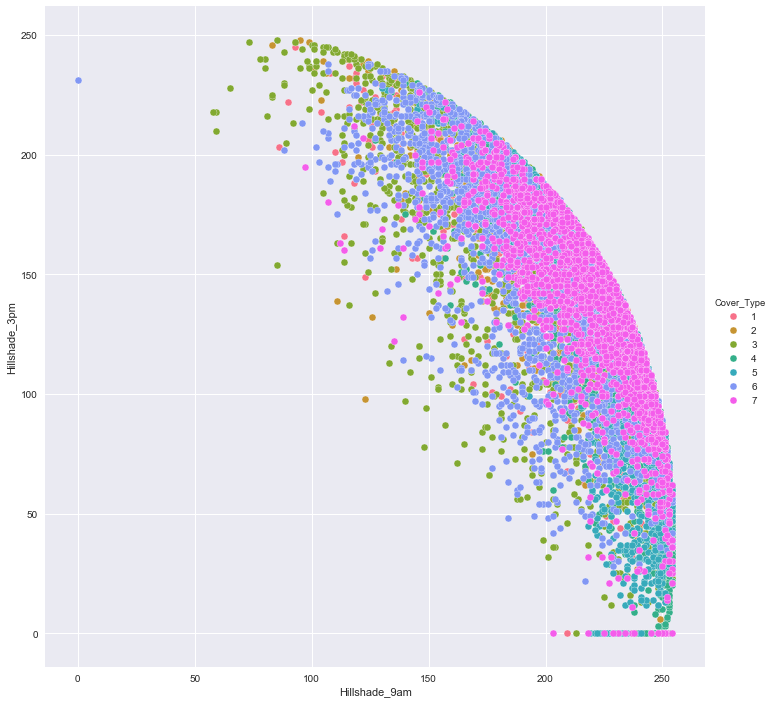

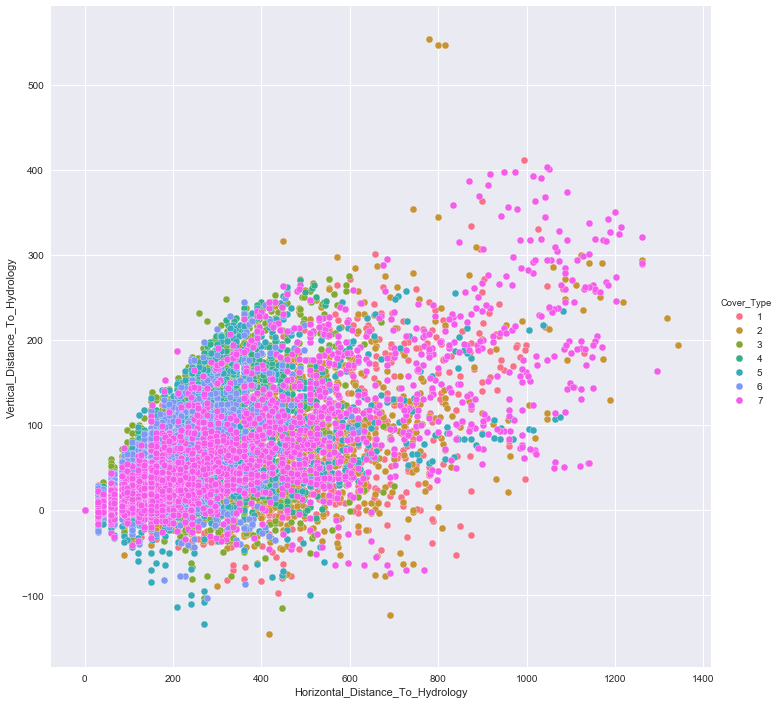

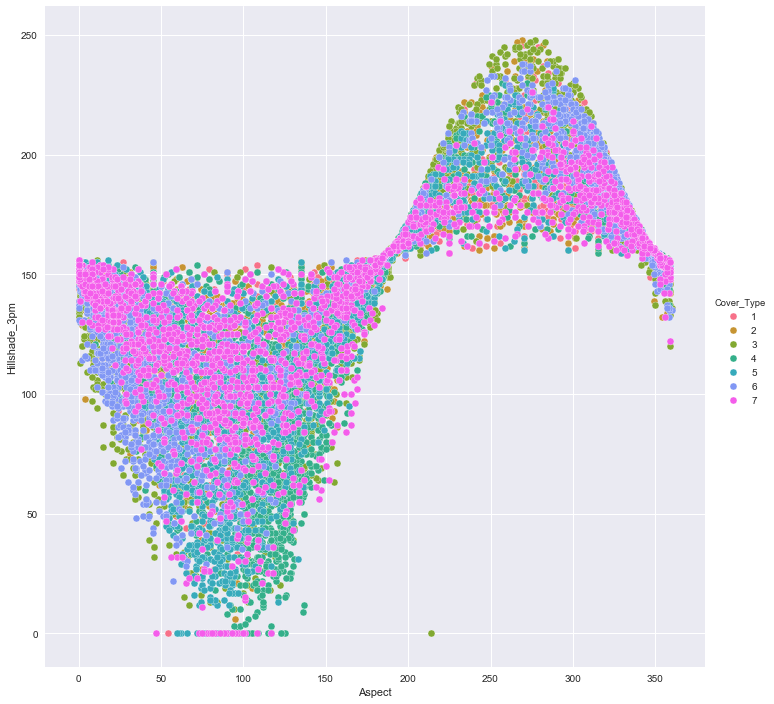

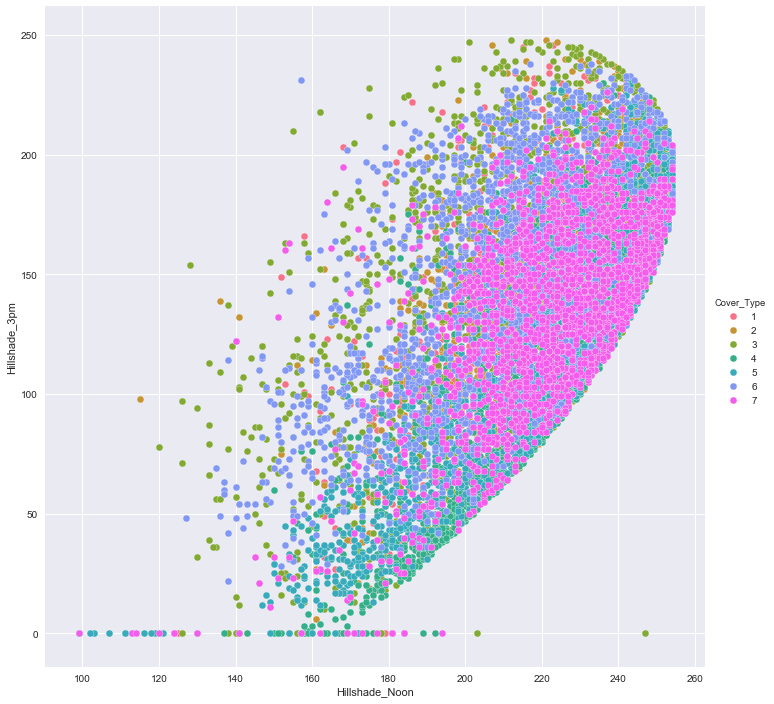

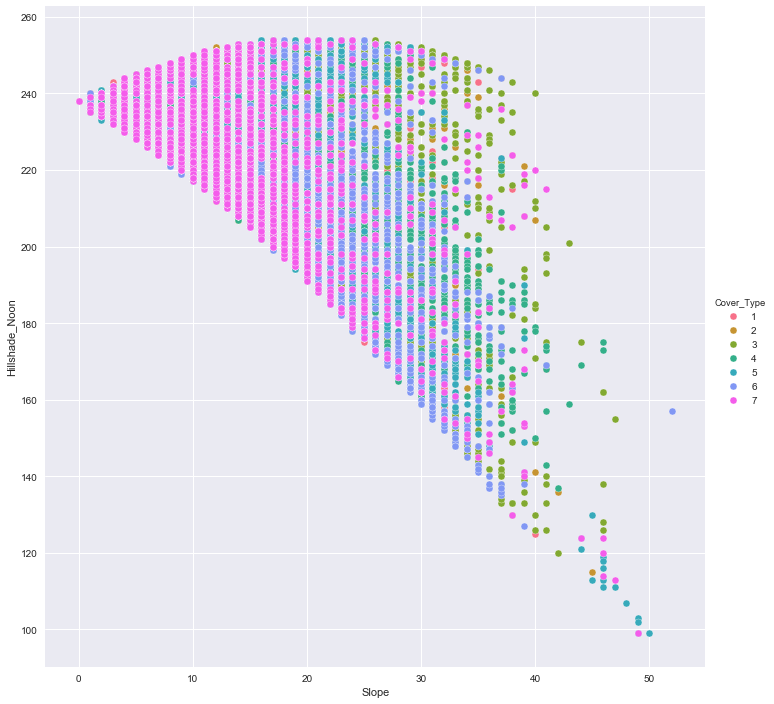

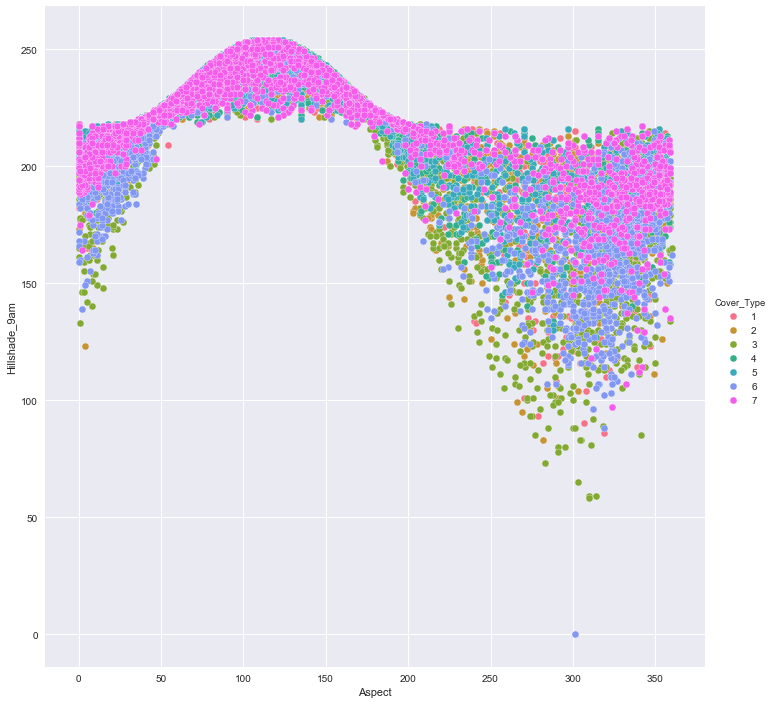

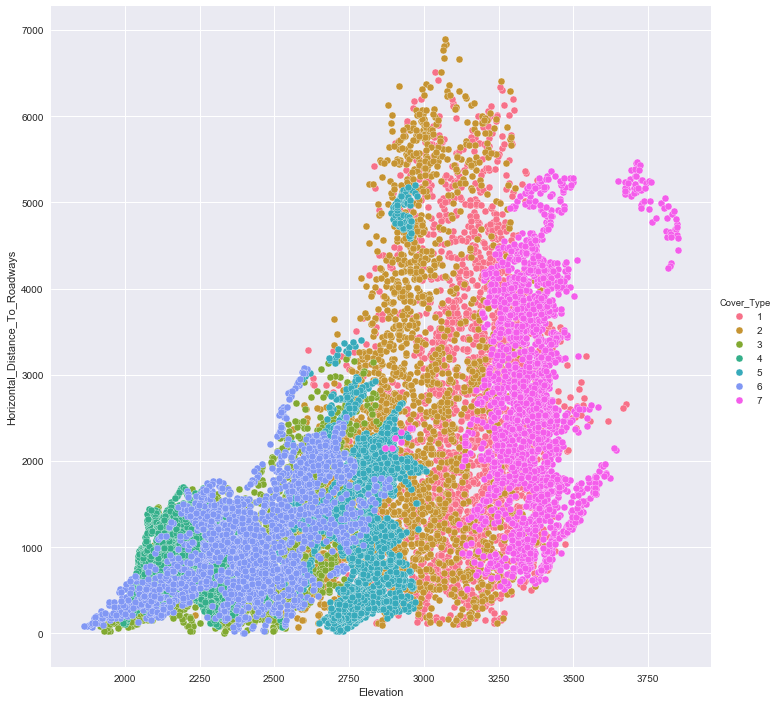

In [54]:
# Scatter plot of only the highly correlated pairs
for v,i,j in s_corr_list:
    sns.pairplot(train, hue="Cover_Type", size=10, x_vars=train_data.columns.values[i],y_vars=train_data.columns.values[j] )
    plt.show()

In [55]:
rem = []

for c in train.columns:
    if train[c].std() == 0: #standard deviation is zero
        rem.append(c)

#drop the columns        
train.drop(rem,axis=1,inplace=True)

print(rem)

['Soil_Type7', 'Soil_Type15']


# Output

In [5]:
model = OneVsRestClassifier(LinearSVC(random_state=0)).fit(X, y)

In [6]:
model = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X, y)

In [16]:
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X, y)

In [17]:
ans = pd.DataFrame()
ans['Id'] = test['Id']
ans['Cover_Type'] = pd.Series(model.predict(test))

# Save and Upload

In [18]:
ans.to_csv('/Users/shiv/Desktop/preliminary_result.csv', index=False)

In [19]:
ans.head()

,Id,Cover_Type
0,15121,1
1,15122,1
2,15123,1
3,15124,1
4,15125,1
